### Student Information
Name: Vijay Dubey

Student ID:108065860

GitHub ID:vijaydubey7

### Part-1

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

---

## 2. Data Preparation
Now let us begin to explore the data. The original dataset can be found on the link provided above or you can directly use the version provided by scikit learn. Here we will use the scikit learn version. 

In this demonstration we are only going to look at 4 categories. This means we will not make use of the complete dataset, but only a subset of it, which includes the 4 categories defined below:

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

Let's take at look some of the records that are contained in our subset of the data

In [5]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [6]:
# category of first 10 documents.
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

**Note:** As you can observe, both approaches above provide two different ways of obtaining the `category` value for the dataset. Ideally, we want to have access to both types -- numerical and nominal -- in the event some particular library favors a particular type. 

As you may have already noticed as well, there is no **tabular format** for the current version of the data. As data miners, we are interested in having our dataset in the most convenient format as possible; something we can manipulate easily and is compatible with our algorithms, and so forth.

Here is one way to get access to the *text* version of the label of a subset of our training data:

In [7]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


---

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [8]:
# Answer here
for t in twenty_train.target[:3]:
    print(twenty_train.target_names[t], "\n")

comp.graphics 

comp.graphics 

soc.religion.christian 



---

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

---

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [9]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [10]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [11]:
len(X)

2257

### Adding Columns

One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset programmatically with very little effort.

In [12]:
# add category to the dataframe
X['category'] = twenty_train.target

In [13]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

Now we can print and see what our table looks like. 

In [14]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### 3.2 Familiarizing yourself with the Data

In [15]:
# a simple query
X[0:10][[ "category_name"]]

category_name
0           comp.graphics
1           comp.graphics
2  soc.religion.christian
3  soc.religion.christian
4  soc.religion.christian
5  soc.religion.christian
6  soc.religion.christian
7                 sci.med
8                 sci.med
9                 sci.med

In [16]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

text  category
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3
80  From: annick@cortex.physiol.su.oz.au (Annick A...         2
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...         0

You can also use the `loc` function to explicity define the columns you want to query. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [17]:
# using loc (by label)
X.loc[::10, 'category_name'][0:10]

0              comp.graphics
10    soc.religion.christian
20    soc.religion.christian
30                   sci.med
40    soc.religion.christian
50             comp.graphics
60               alt.atheism
70    soc.religion.christian
80                   sci.med
90               alt.atheism
Name: category_name, dtype: object

In [18]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2   
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3   
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1   
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0   
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
80  From: annick@cortex.physiol.su.oz.au (Annick A...         2   
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...         0   

             category_name  
0            comp.graphics  
10  soc.religion.christian  
20  soc.religion.christian  
30                 sci.med  
40  soc.religion.christian  
50           comp.graphics  
60             alt.atheism  
70  soc.religion.christian  
80                 sci.med  
90             alt.atheism

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [19]:
#Answer here
X.loc[lambda f: f.category_name == 'sci.med'].iloc[::10, :][0:5]

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

---

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [20]:
# Answer here
X.loc[lambda f: f.category_name == 'comp.graphics'].iloc[::10, :][0:5]

text  category  \
0    From: sd345@city.ac.uk (Michael Collier) Subje...         1   
43   From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...         1   
76   From: sts@mfltd.co.uk (Steve Sherwood (x5543))...         1   
107  From: samson@prlhp1.prl.philips.co.uk (Mark Sa...         1   
172  From: thinman@netcom.com (Technically Sweet) S...         1   

     category_name  
0    comp.graphics  
43   comp.graphics  
76   comp.graphics  
107  comp.graphics  
172  comp.graphics

---

## 4. Data Mining using Pandas

Let's do some serious work now. Let's learn to program some of the ideas and concepts learned so far in the data mining course. This is the only way we can be convince ourselves of the true power of Pandas dataframes. 

### 4.1 Missing Values

As mentioned earlier, we are going to go with the first option but you may be asked to compute missing values, using a different approach, as an exercise. Let's get to it!

First we want to add the dummy records with missing values since the dataset we have is perfectly composed and cleaned that it contains no missing values. First let us check for ourselves that indeed the dataset doesn't contain any missing values. We can do that easily by using the following built-in function provided by Pandas.  

In [21]:
X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2252  False     False          False
2253  False     False          False
2254  False     False          False
2255  False     False          False
2256  False     False          False

[2257 rows x 3 columns]

The `isnull` function looks through the entire dataset for null values and returns `True` wherever it finds any missing field or record. As you will see above, and as we anticipated, our dataset looks clean and all values are present, since `isnull` returns **False** for all fields and records. But let us start to get our hands dirty and build a nice little function to check each of the records, column by column, and return a nice little message telling us the amount of missing records found. This excerice will also encourage us to explore other capabilities of pandas dataframes. In most cases, the build-in functions are good enough, but as you saw above when the entire table was printed, it is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!

In [22]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

Okay, a lot happened there in that one line of code, so let's break it down. First, with the `isnull` we tranformed our table into the **True/False** table you see above, where **True** in this case means that the data is missing and **False** means that the data is present. We then take the transformed table and apply a function to each row that essentially counts to see if there are missing values in each record and print out how much missing values we found. In other words the `check_missing_values` function looks through each field (attribute or column) in the dataset and counts how many missing values were found. 

There are many other clever ways to check for missing data, and that is what makes Pandas so beautiful to work with. You get the control you need as a data scientist or just a person working in data mining projects. Indeed, Pandas makes your life easy!

---

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [23]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

---

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

We will insert a `Series`, which is basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.", into our current dataframe.

In [24]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [25]:
dummy_series

text        dummy_record
category               1
dtype: object

In [26]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [27]:
# check if the records was commited into result
len(result_with_series)

2258

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [28]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice that above we are not changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [29]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [30]:
X = X.append(dummy_dict, ignore_index=True)

In [31]:
len(X)

2258

In [32]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   1

So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [33]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [34]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

In [35]:
len(X)

2257

And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

But just in case you want to learn more about how to deal with missing data, refer to the official [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [36]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [37]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here
by the method .isnull() is of type str outputs True, for both np.nan and None in dictionary. If we don't supply value for missing_example to the dictionary (as in row with id B) we can see that Pandas automatically adds a np.nan cell to the DataFrame; from this we can assume this is Pandas' preferred representation for missing values.

---

In [50]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [51]:
sum(X.duplicated())

0

Based on that output, you may be asking why did the `duplicated` operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the `duplicated()` operation does is to check per records instead of per column. That is why the operation only returns one value instead of three values for each column. It appears that we don't have any duplicates since none of our records resulted in `True`. If we want to check for duplicates as we did above for some particular column, instead of all columns, we do something as shown below. As you may have noticed, in the case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicates by onyl checking the `text` attribute. 

In [40]:
sum(X.duplicated('text'))

0

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [52]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [42]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [43]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [44]:
len(X)

2257

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [45]:
len(X)

2257

In [46]:
sum(X.duplicated('text'))

0

In [47]:
X_sample = X.sample(n=1000) #random state

In [48]:
len(X_sample)

1000

We have added the dummy duplicates to `X`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

In [49]:
X_sample[0:4]

text  category  \
1632  From: khan0095@nova.gmi.edu (Mohammad Razi Kha...         1   
153   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
1016  From: darice@yoyo.cc.monash.edu.au (Fred Rice)...         0   
174   From: luom@storm.cs.orst.edu (Luo Martha BaoMi...         3   

               category_name  
1632           comp.graphics  
153              alt.atheism  
1016             alt.atheism  
174   soc.religion.christian

---

Check out the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html?highlight=duplicate#duplicate-data) for more information on dealing with duplicate data.

---

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to peform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [53]:
# Answer here
X.sample=X.sample(n=1000)

In [54]:
pd.set_option('display.width', 700)
print("Full dataset")
print(X.head())
print(X.shape)
print('------------')
print("Sample value")
print(X_sample.head())
print(X_sample.shape)


Full dataset
                                                text  category           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3  soc.religion.christian
(2257, 3)
------------
Sample value
                                                   text  category           category_name
1632  From: khan0095@nova.gmi.edu (Mohammad Razi Kha...         1           comp.graphics
153   From: keith@cco.caltech.edu (Keith Allan Schne...         0             alt.atheism
1016  From: darice@yoyo.cc.monash.edu.au (Fred Rice)...         0             alt.atheism
174   From: luom@storm.cs.orst.edu (Luo Martha BaoMi...         3  so

In the course dataframe contains less records and the index is not sorted anymore. it doesn't contain all values, this means that hete .iloc and .loc can not be interchangeably for rows anymore.

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    266
sci.med                   260
comp.graphics             250
alt.atheism               224
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

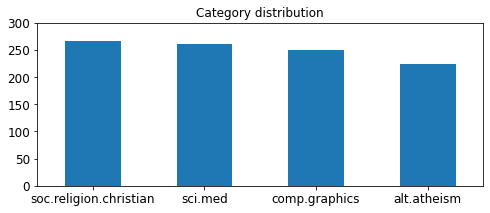

In [57]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

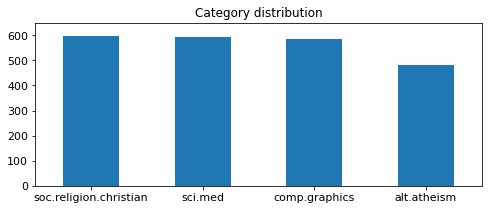

In [58]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

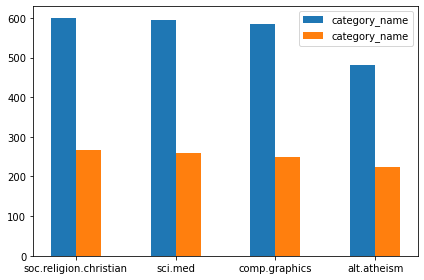

In [59]:
# Answer here
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(len(X.category_name.value_counts()))
width = 0.25
max_y = X.category_name.value_counts().max()

fig, ax = plt.subplots()
ax.set_xticks(x)
ax.set_xticklabels(X.category_name.value_counts().index)
ax.bar(x=x - width/2, height=X.category_name.value_counts(), width=width, label='category_name')
ax.bar(x=x + width/2, height=X_sample.category_name.value_counts(),  width=width, label='category_name')
fig.tight_layout()
ax.legend()
plt.show()

In [60]:
import nltk

In [61]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [62]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data. 

---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

What we did with those two lines of code is that we transorfmed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analzyer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

In [64]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

---

In [65]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [66]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

![alt txt](https://i.imgur.com/57gA1sd.png)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [67]:
# Answer here
import nltk
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
feature_names = count_vect.get_feature_names()
X_counts_array = X_counts[0:5, 0:100].toarray()

def get_word(array, index):
    ones = np.where(array == 1)[0]
    return feature_names[ones[index]]

get_word(X_counts_array[4], index=1)

'01'

In [68]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

Now let us put a `00` in the document to see if it is detected as we expect. 

In [69]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

Impressive, huh!

To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [70]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [71]:
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [72]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [73]:
plot_z = X_counts[0:20, 0:20].toarray()

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

![alt txt](https://i.imgur.com/1isxmIV.png)

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

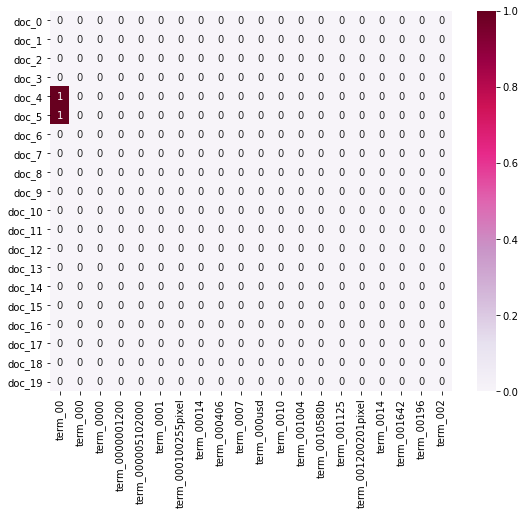

In [74]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [76]:
plot_x_draw = ["term_"+str(i) for i in count_vect.get_feature_names()[20:40]]
plot_y_draw = ["doc_"+ str(i) for i in list(df_all_text.label)[20:40]]
plot_z_draw = df_all_text_counts[20:40, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z_draw, columns = plot_x_draw, index = plot_y_draw)
plt.subplots(figsize=(15, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

NameError: name 'df_all_text' is not defined

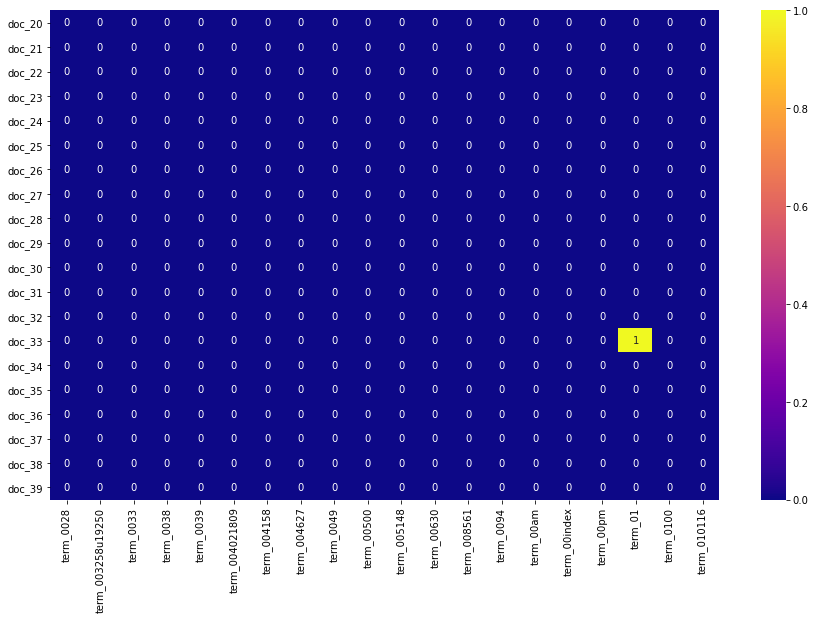

In [89]:
# Answer here
plot_x_draw = ["term_"+str(i) for i in count_vect.get_feature_names()[20:40]]
plot_y_draw = ["doc_"+ str(i) for i in list(X.index)[20:40]]
plot_z_draw = X_counts[20:40, 20:40].toarray()

df_todraw = pd.DataFrame(plot_z_draw, columns = plot_x_draw, index = plot_y_draw)
plt.subplots(figsize=(15, 9))
ax = sns.heatmap(df_todraw,
                 cmap="plasma",
                 vmin=0, vmax=1, annot=True)

---

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

---

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [90]:
from sklearn.decomposition import PCA

In [91]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [92]:
X_reduced.shape

(2257, 2)

In [93]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

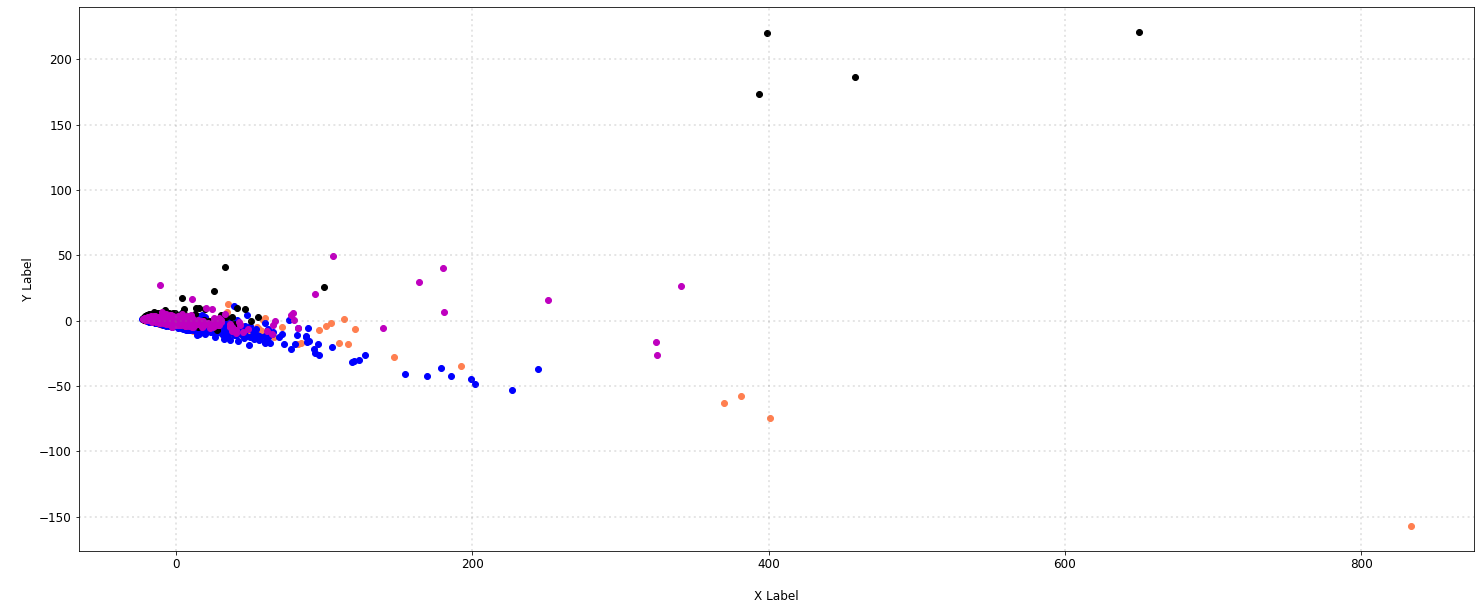

In [97]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

From the 2D visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


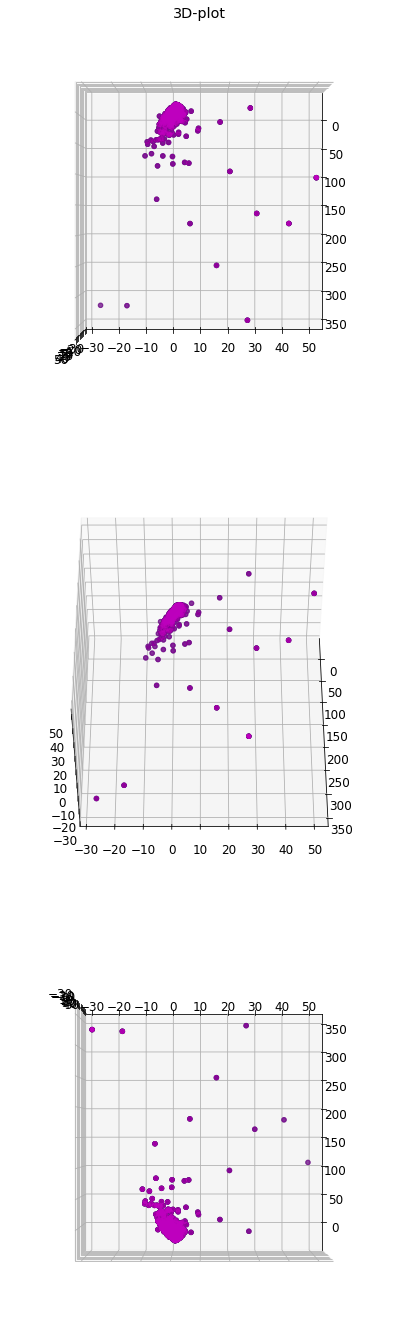

In [114]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

col = ['coral', 'blue', 'black', 'm']
print(categories)

fig = plt.figure(figsize=(24,24))
plt.rcParams.update({'font.size': 12})

ax1 = fig.add_subplot(3,1,3, projection='3d')
ax2 = fig.add_subplot(3,1,2, projection='3d')
ax3 = fig.add_subplot(3,1,1, projection='3d')
for c, cat in zip(col, categories): 
    X1 = X_reduced[X['category_name'] == category].T[0]
    X2 = X_reduced[X['category_name'] == category].T[1]
    X3 = X_reduced[X['category_name'] == category].T[2]
    ax1.scatter(X1, X2, X3, c = c, marker = 'o')
    ax2.scatter(X1, X2, X3, c = c, marker = 'o')
    ax3.scatter(X1, X2, X3, c = c, marker = 'o')
plt.title("3D-plot")
ax1.view_init(elev=-90.,azim =0 )
ax2.view_init(elev=50.,azim =0 )
ax3.view_init(elev=90.,azim =0)


3d scatterplot using different angles, we can better appreciate the separation between the classes. We can also see that most of the data is concentrated in one area, with a few outliers clearly separated into different regions. 

### 5.5 Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [115]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [116]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [117]:
term_frequencies[0]

134

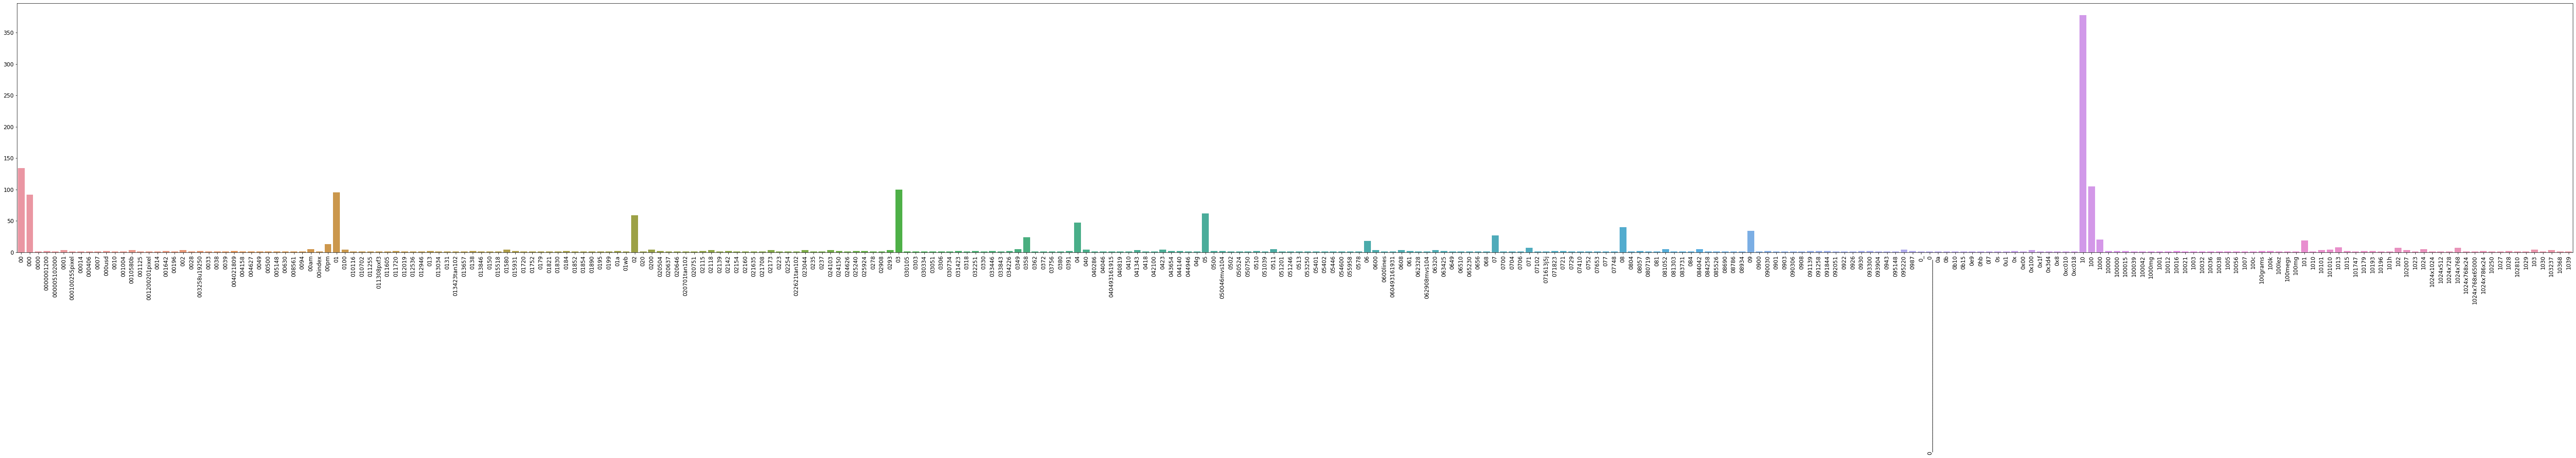

In [118]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [120]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode()
data = [go.Bar(
            x = count_vect.get_feature_names()[:300],
            y = term_frequencies[:300]
    )]

layout = go.Layout(xaxis=dict(type='category'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)


---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


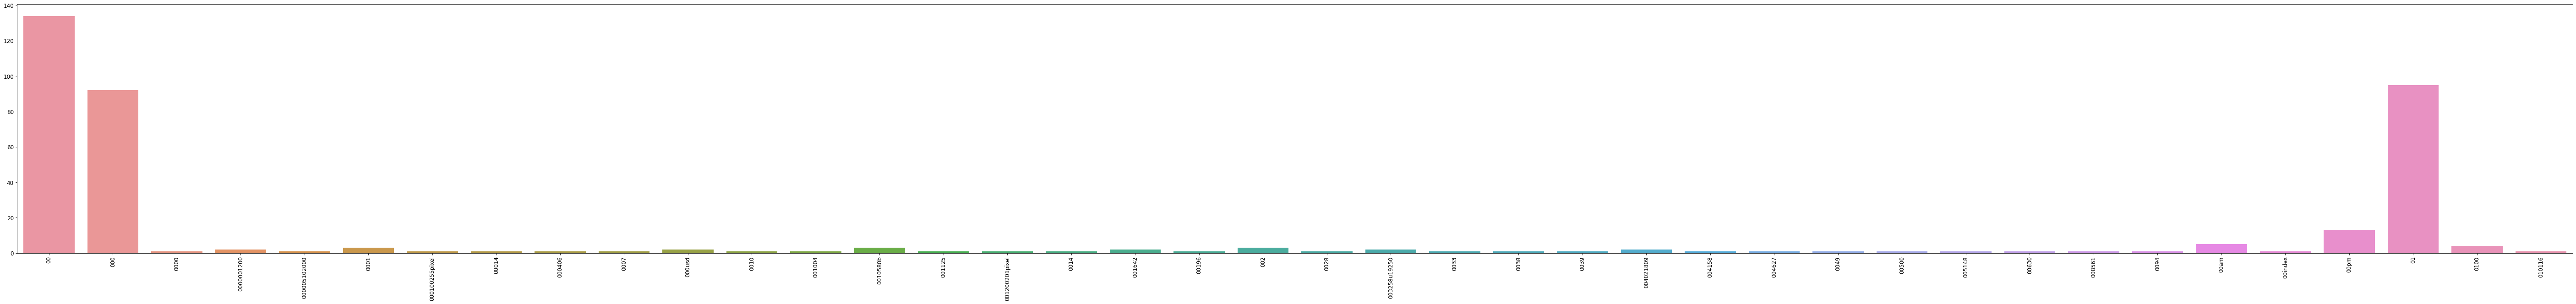

In [121]:
# Answer here
plt.subplots(figsize=(100, 10))
g_efficient = sns.barplot(x=count_vect.get_feature_names()[:40], 
            y=term_frequencies[:40])
g_efficient.set_xticklabels(count_vect.get_feature_names()[:40], rotation = 90);

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

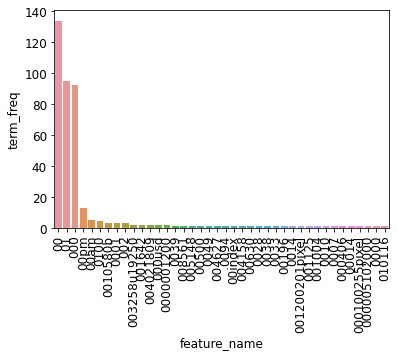

In [123]:
# Answer here
sort_df = pd.DataFrame({'feature_name': count_vect.get_feature_names()[:40], 
                        'term_freq': term_frequencies[:40] })
###Use top 40 only, to make it efficient 
sort_df = sort_df.sort_values('term_freq', ascending=False)
g_efficient = sns.barplot(x=sort_df.feature_name, 
            y=sort_df.term_freq)
g_efficient.set_xticklabels(sort_df.feature_name, rotation = 90);

---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [124]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

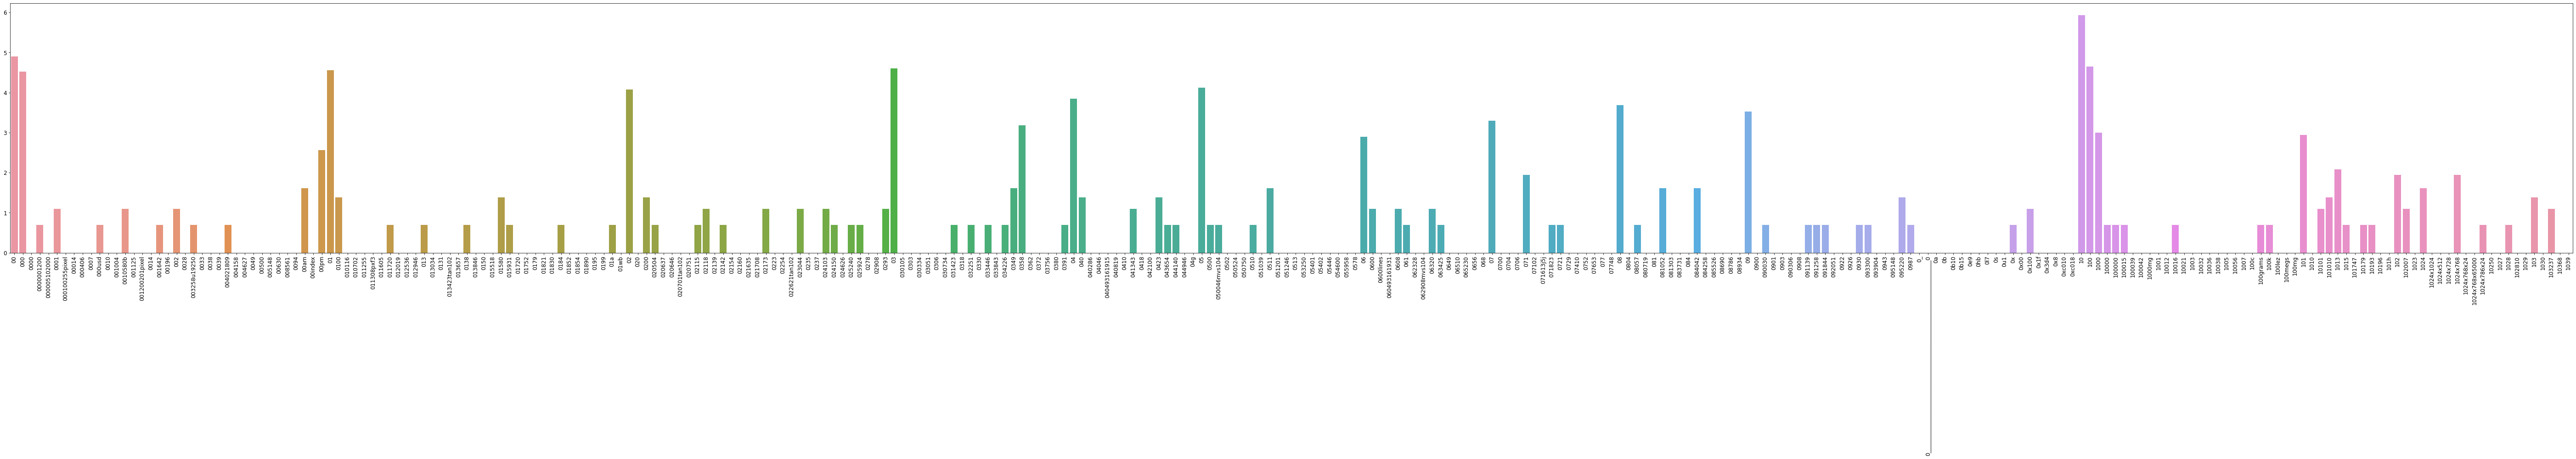

In [125]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [126]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [127]:
mlb = preprocessing.LabelBinarizer()

In [128]:
mlb.fit(X.category)

LabelBinarizer()

In [129]:
mlb.classes_

array([0, 1, 2, 3])

In [130]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [131]:
X[0:9]

text  category           category_name                                           unigrams  bin_category
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  [0, 1, 0, 0]
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  [0, 1, 0, 0]
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  [0, 0, 0, 1]
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...  [0, 0, 0, 1]
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...  [0, 0, 0, 1]
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...  [0, 0, 0, 1]
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...  [0, 0, 0, 1]
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...  [0, 0, 1, 0]
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...  [0, 0, 1, 0]

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [132]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

The binarization seems to work when using category_name, as long as the same column is used both in the fit and the transform method.

---

### Part-2

In [1]:
import pandas as pd

def load_data(data_source, delimiter='\t'):
    df = pd.read_csv(f'/home/vijay/VD/course_Sem/Sem4/DM/lab1_again/DM2021-Lab1-master/DM2021-Lab1-Homework/data/{data_source}_labelled.txt', delimiter=delimiter, header=None, dtype={'sentence': 'str', 'score': 'float'}, names=['sentence', 'score'])
    df['source'] = data_source
    return df

# imdb data has a slightly different formatting, so we need to use a different delimiter
df = pd.concat([load_data('yelp'), load_data('imdb', ' \t'), load_data('amazon_cells')])

/home/vijay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='score', ylabel='count'>

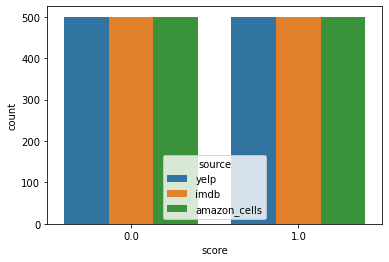

In [2]:
import seaborn as sns

# The dataset (as advertised) is completely balanced in both scores and sources 
sns.countplot(data=df, x='score', hue='source')

In [3]:
df.isnull().sum()

sentence    0
score       0
source      0
dtype: int64

In [4]:
df['sentence'].head(10)

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
9                                       A great touch.
Name: sentence, dtype: object

In [5]:
df['sentence_length'] = df['sentence'].apply(len)
print(f"Mean sentence length: {df['sentence_length'].mean()}")
print(f"Sentence length standard deviation: {df['sentence_length'].std()}")

Mean sentence length: 64.938
Sentence length standard deviation: 44.03754372978328


<AxesSubplot:xlabel='sentence_length', ylabel='Density'>

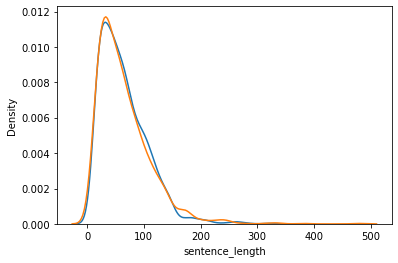

In [6]:
# here distribution of sentence lengths doesn't change much based on score
sns.kdeplot(df[df['score'] == 0]['sentence_length'])
sns.kdeplot(df[df['score'] == 1]['sentence_length'])

In [7]:
# These are the shortest sentences, and they are still valid reviews.
df[df['sentence_length'] == df['sentence_length'].min()]['sentence']

125    10/10 
788    10/10 
Name: sentence, dtype: object

In [8]:
# check duplicates, but there's no need to remove them, as they are legitimatly common reviews.
df[df.duplicated()]

sentence  score        source  \
814                                 I love this place.    1.0          yelp   
816                             The food was terrible.    0.0          yelp   
843                                   I won't be back.    0.0          yelp   
846                  I would not recommend this place.    0.0          yelp   
363                    Definitely worth checking out.     1.0          imdb   
585                                  Not recommended.     0.0          imdb   
788                                             10/10     1.0          imdb   
285                                      Great phone!.    1.0  amazon_cells   
407                                       Works great.    1.0  amazon_cells   
524                                      Works great!.    1.0  amazon_cells   
543                            Don't buy this product.    0.0  amazon_cells   
744  If you like a loud buzzing to override all you...    0.0  amazon_cells   
748                                      Does not fit.    0.0  amazon_cells   
778                              This is a great deal.    1.0  amazon_cells   
792                                       Great Phone.    1.0  amazon_cells   
892                   Excellent product for the price.    1.0  amazon_cells   
896                                       Great phone.    1.0  amazon_cells   

     sentence_length  
814               18  
816               22  
843               16  
846               33  
363               31  
585               17  
788                6  
285               13  
407               12  
524               13  
543               23  
744               90  
748               13  
778               21  
792               12  
892               32  
896               12

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# Tokenize the text, removing accents, punctuation, stop_words and making everything lowercase
count_vect = CountVectorizer(
    lowercase=True, 
    stop_words='english', 
    strip_accents='ascii'
)
word_counts = count_vect.fit_transform(df.sentence)

In [10]:
count_vect.get_feature_names()[0:20]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980']

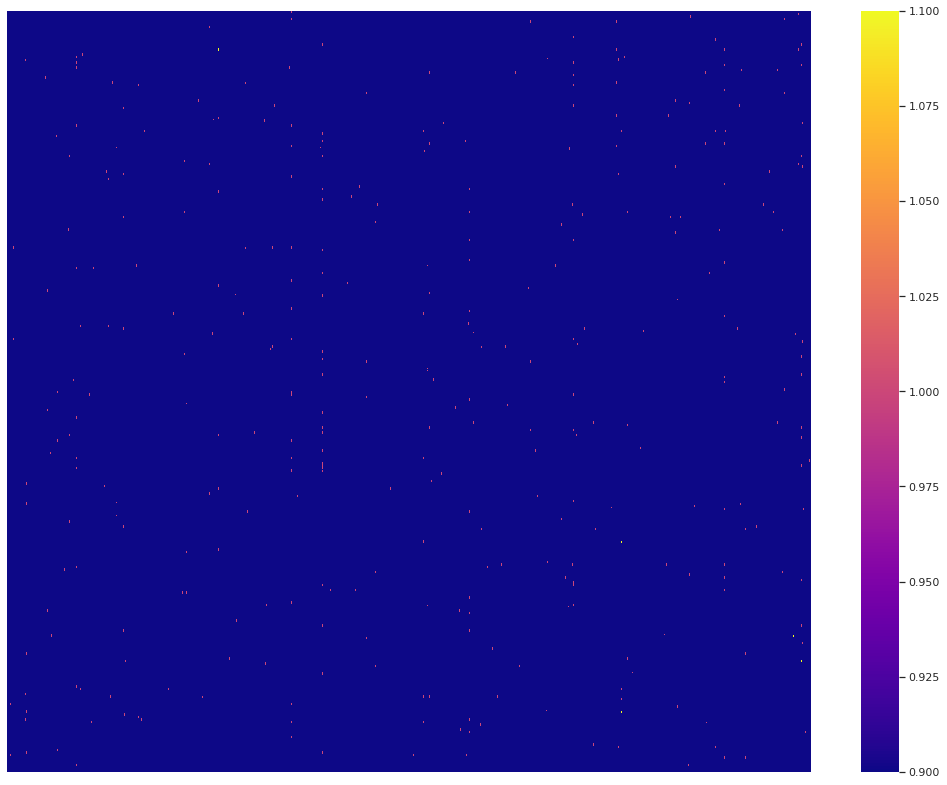

In [11]:
# We can see that the matrix is still quite sparse
import matplotlib.pyplot as plt
docs_to_words_df = pd.DataFrame(
    word_counts.toarray(), 
    columns = count_vect.get_feature_names(), 
    index = df.index)
docs_to_words_df['special_score'] = df['score']
docs_to_words_df['special_source'] = df['source']

plt.subplots(figsize=(18, 14))
sns.set(rc={},style="dark")
ax = sns.heatmap(data=docs_to_words_df.drop(['special_score', 'special_source'], axis=1).sample(frac=0.1),
                 cmap="plasma", xticklabels=False, yticklabels=False, annot=False,
                 vmin=1, vmax=1)

<AxesSubplot:xlabel='frequency', ylabel='Density'>

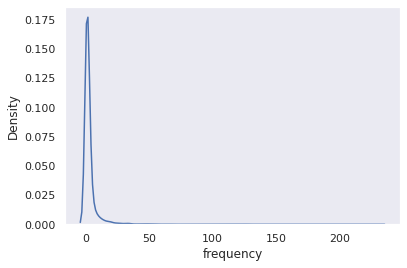

In [12]:
word_frequencies_df = pd.DataFrame(docs_to_words_df.drop(['special_score', 'special_source'], axis=1).sum(axis=0).astype('int'), columns=['frequency'])

# plot distribution of word frequency
sns.kdeplot(word_frequencies_df['frequency'])

<AxesSubplot:xlabel='frequency', ylabel='Density'>

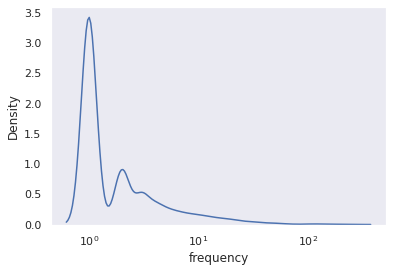

In [13]:
# Plot distribution of word frequency with log scale
sns.kdeplot(word_frequencies_df['frequency'], log_scale=True)

### Part 3

In [29]:
#pip install wordcloud
len(df)

3000

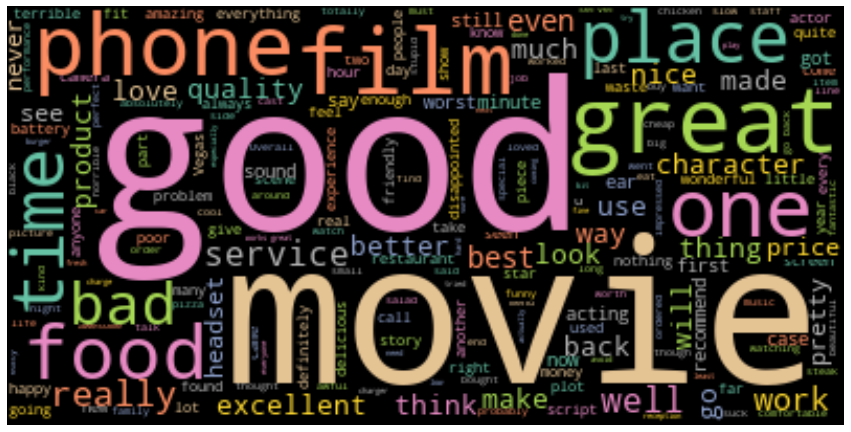

In [34]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

textt = " ".join(review for review in df['sentence'])
wordcloud = WordCloud(colormap='Set2').generate(textt)

plt.subplots(figsize=(15, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

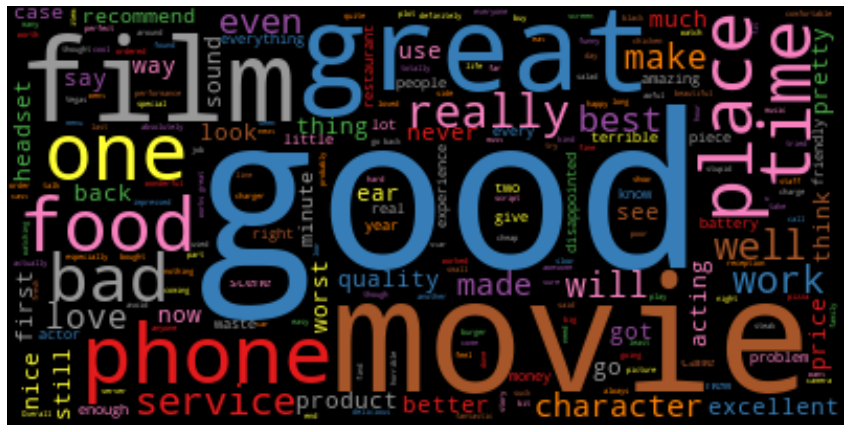

In [40]:
wordcloud = WordCloud(colormap='Set1').generate(textt)

plt.subplots(figsize=(15, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

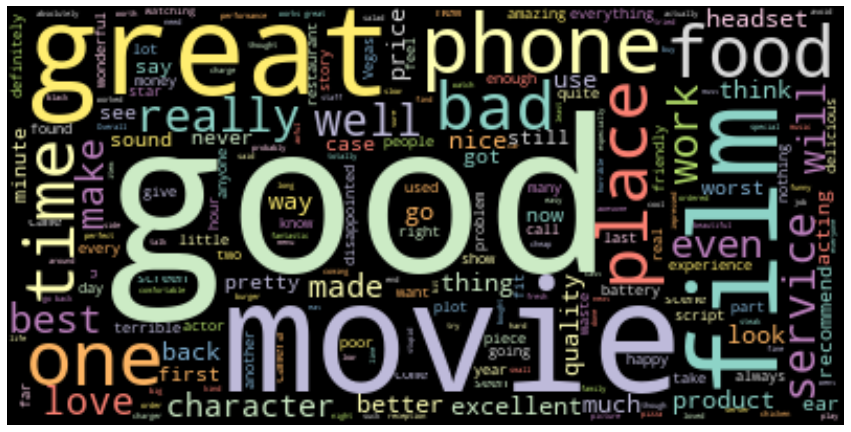

In [41]:
wordcloud = WordCloud(colormap='Set3').generate(textt)

plt.subplots(figsize=(15, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Lists of word frequencies can be quite long, and word clouds are a nice way to visualize them in a compact way, while conveying quite a lot of information, both qualitative and quantitative. Word clouds
At a glance, we can see that people that write negative reviews use a more limited vocaboulary (e.g. bad, poor, stupid), whereas positive reviews tend to be more expressive and try to convey a more nuanced impression. 
Also, splitting by categories gives us an idea of what people consider important in making a restaurant, product or movie good/bad. 
One example that I want to mention in the negative Yelp reviews is how much bigger 'minutes' is compared to 'overpriced', suggesting that people care more about the service being fast than the price being low.

In [37]:
# Create TD-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the text, removing accents, punctuation, stop_words and making everything lowercase
vectorizer = TfidfVectorizer(
    lowercase=True, 
    stop_words='english', 
    strip_accents='ascii'
)
word_counts_tfidf = vectorizer.fit_transform(df.sentence)

In [38]:
docs_to_words_tfidf_df = pd.DataFrame(
    word_counts_tfidf.toarray(), 
    columns = vectorizer.get_feature_names(), 
    index = df.index)
docs_to_words_tfidf_df['special_score'] = df['score']
docs_to_words_tfidf_df['special_source'] = df['source']

## Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb.fit(word_counts, df['score'].values)

MultinomialNB()

In [41]:
test_data = pd.Series([
    'food is crap',                     # negative
    'Best restaurant in town',          # positive
    'didn\'t work well at all',         # negative
    
    'not good',                         # negative
    'you better not go there',          # negative
    'the waiter was a good-for-nothing' # negative
])

mnb.predict(count_vect.transform(test_data).toarray())

array([0., 1., 0., 1., 1., 1.])

In [42]:
# Create a new tokenization, this time without removing stopwords
count_vect_stopwords = CountVectorizer(
    lowercase=True, 
    strip_accents='ascii'
)
word_counts_stopwords = count_vect_stopwords.fit_transform(df.sentence)

mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb.fit(word_counts_stopwords, df['score'].values)
mnb.predict(count_vect_stopwords.transform(test_data).toarray())

array([0., 1., 0., 0., 0., 0.])

In [43]:
# We vectorize the text, this time without removing stopwords
vectorizer_stopwords = TfidfVectorizer(
    lowercase=True, 
    strip_accents='ascii'
)
word_counts_tfidf_stopwords = vectorizer_stopwords.fit_transform(df.sentence)

In [44]:
mnb_2 = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb_2.fit(word_counts_tfidf_stopwords, df['score'].values)
mnb_2.predict(vectorizer_stopwords.transform(test_data).toarray())

array([0., 1., 0., 0., 0., 0.])

In [45]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df)

# Train word frequency model on training set
final_count_vect = CountVectorizer(lowercase=True, strip_accents='ascii')
final_word_counts_train = final_count_vect.fit_transform(train_df.sentence)

final_mnb = MultinomialNB(alpha=0.6)
final_mnb.fit(final_word_counts_train, train_df.score.values)

# Train td-idf frequency model on training set
final_vectorizer = TfidfVectorizer(lowercase=True, strip_accents='ascii')
final_word_counts_tfidf_train = final_vectorizer.fit_transform(train_df.sentence)

final_mnb_td_idf = MultinomialNB(alpha=0.6)
final_mnb_td_idf.fit(final_word_counts_tfidf_train, train_df.score.values)

final_word_counts_test = final_count_vect.transform(test_df.sentence)
final_mnb_acc = final_mnb.score(final_word_counts_test, test_df['score'].values)
print(f'Word frequency mean accuracy: {final_mnb_acc}')
final_word_counts_tfidf_test = final_vectorizer.transform(test_df.sentence)
final_mnb_td_idf_acc = final_mnb_td_idf.score(final_word_counts_tfidf_test, test_df['score'].values)
print(f'TD-IDF mean accuracy: {final_mnb_td_idf_acc}')

Word frequency mean accuracy: 0.8133333333333334
TD-IDF mean accuracy: 0.8093333333333333


The accuracies achieved by the 2 models are pretty similar, and due to the limited size of both training and test data we can't consider the difference to be significant. To get more insight we can look at the confusion matrix for the 2 models.

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

final_word_count_predicted = final_mnb.predict(final_word_counts_test)
print(classification_report(test_df['score'], final_word_count_predicted))
print(confusion_matrix(test_df['score'], final_word_count_predicted))
final_word_count_td_idf_predicted = final_mnb_td_idf.predict(final_word_counts_tfidf_test)
print(classification_report(test_df['score'], final_word_count_td_idf_predicted))
print(confusion_matrix(test_df['score'], final_word_count_td_idf_predicted))

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       365
         1.0       0.83      0.79      0.81       385

    accuracy                           0.81       750
   macro avg       0.81      0.81      0.81       750
weighted avg       0.81      0.81      0.81       750

[[304  61]
 [ 79 306]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       365
         1.0       0.83      0.79      0.81       385

    accuracy                           0.81       750
   macro avg       0.81      0.81      0.81       750
weighted avg       0.81      0.81      0.81       750

[[302  63]
 [ 80 305]]


The differences are minimal, and more than likely they are due to chance.

We expected to see an improvement in performance when using TD-IDF as compared to word frequencies, but this is not the case. The cause could be that the number examples is not high enough for the inverse document frequency to make a difference; also we have seen that some reviews can be quite short, reduing even further the total number of word occurrences we can use to learn a powerful model.

### Part 4

One thing that stands out as very inefficient is the way `term_frequencies` has been calculated.
In general it's bad practice to use `for` loops in Python, especially if we are iterating over big lists. As you can see in Exercise 13, I replaced it with one line using Pandas. Pandas can at times make use of the low-level vectorization provided by Numpy, but it still has some overhead compared to pure Numpy.
Another similar example is the function `dmh.tokenize_text(x)`, where 2 nested for loops are used to tokenize the text. Again, using anything but `for` loops will improve performance, for example list comprehensions or lambda functions.